# Stock Exchange Data Analysis

## Import Libraries

In [27]:
import pandas
from sklearn.model_selection import train_test_split


## Data Exploration

### Load and Filter the Data


In [28]:
# Load the stock data and check whether it has been loaded correctly.
data = pandas.read_csv("data/index_processed.csv")
print("Data Info Overview:")
data.info()

print("\nData After Removing Columns:")
# Restrict analysis to focus on the adjusted close price of each index per day.
data = data[["Date", "Index", "Adj Close"]]
display(data)


Data Info Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104224 entries, 0 to 104223
Data columns (total 9 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   Index      104224 non-null  object 
 1   Date       104224 non-null  object 
 2   Open       104224 non-null  float64
 3   High       104224 non-null  float64
 4   Low        104224 non-null  float64
 5   Close      104224 non-null  float64
 6   Adj Close  104224 non-null  float64
 7   Volume     104224 non-null  float64
 8   CloseUSD   104224 non-null  float64
dtypes: float64(7), object(2)
memory usage: 7.2+ MB

Data After Removing Columns:


Date    Index     Adj Close
0       1986-12-31      HSI   2568.300049
1       1987-01-02      HSI   2540.100098
2       1987-01-05      HSI   2552.399902
3       1987-01-06      HSI   2583.899902
4       1987-01-07      HSI   2607.100098
...            ...      ...           ...
104219  2021-05-25  J203.JO  66076.679690
104220  2021-05-26  J203.JO  66108.226560
104221  2021-05-27  J203.JO  66940.250000
104222  2021-05-28  J203.JO  67554.859380
104223  2021-05-31  J203.JO  67964.039060

[104224 rows x 3 columns]

### Split the Data by Index

In [29]:
# Split the data set by 'Index' column.
data_frames_per_index = {
    key: data.loc[value] for key, value in data.groupby("Index").groups.items()
}

# Show how many rows of data are available for each index.
print("Sample Size Per Index:")
for index, data_frame in data_frames_per_index.items():
    print(f"{index}: {len(data_frame)}")


Sample Size Per Index:
000001.SS: 5791
399001.SZ: 5760
GDAXI: 8438
GSPTSE: 10526
HSI: 8492
IXIC: 12690
J203.JO: 2346
N100: 5474
N225: 13874
NSEI: 3346
NYA: 13947
SSMI: 7671
TWII: 5869


## Feature Engineering

### Simple Moving Averages

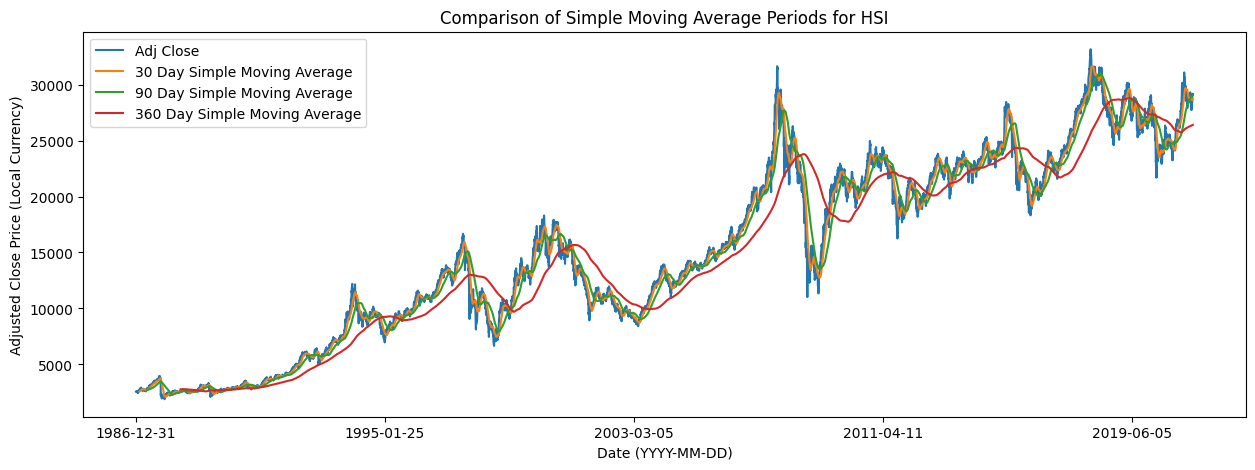

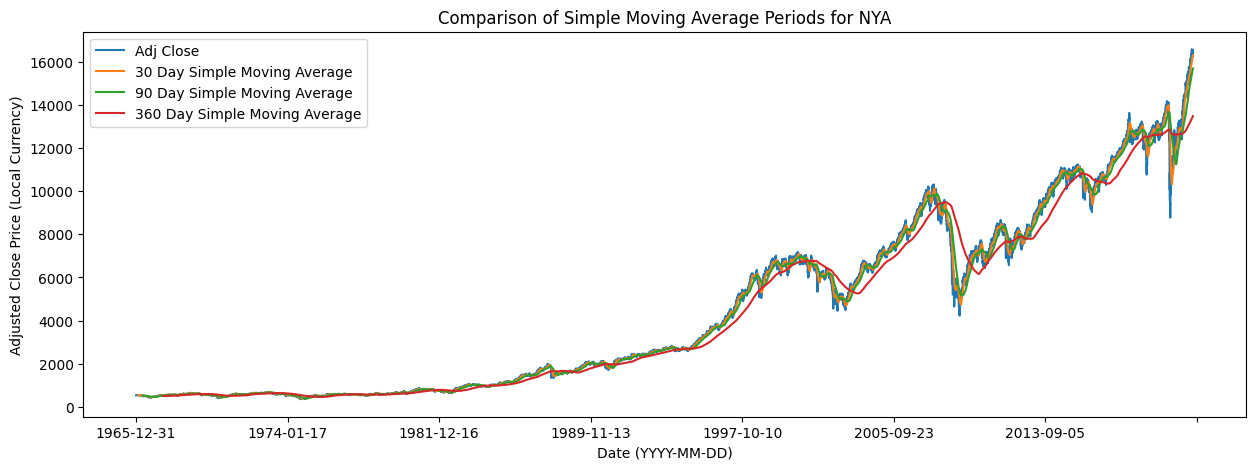

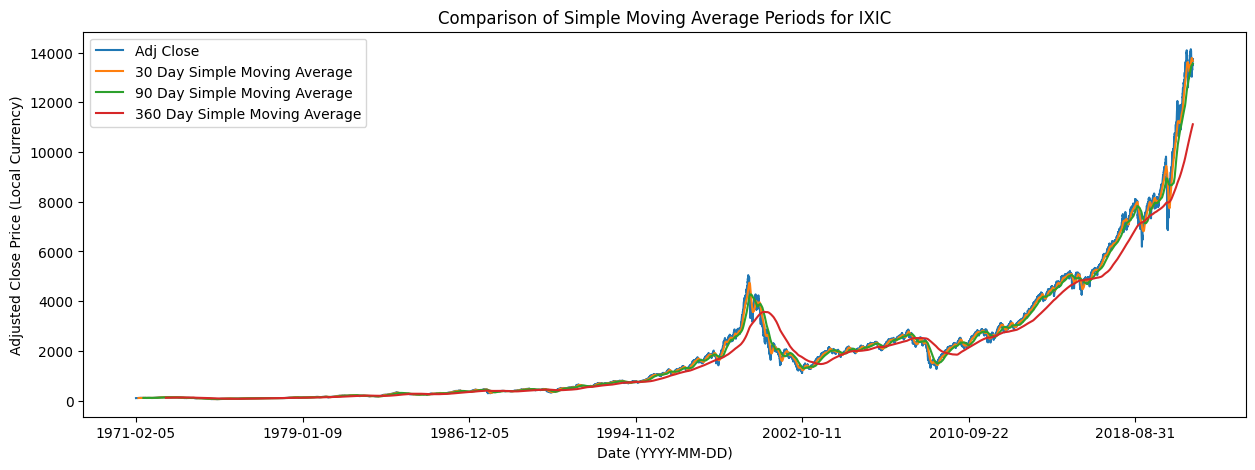

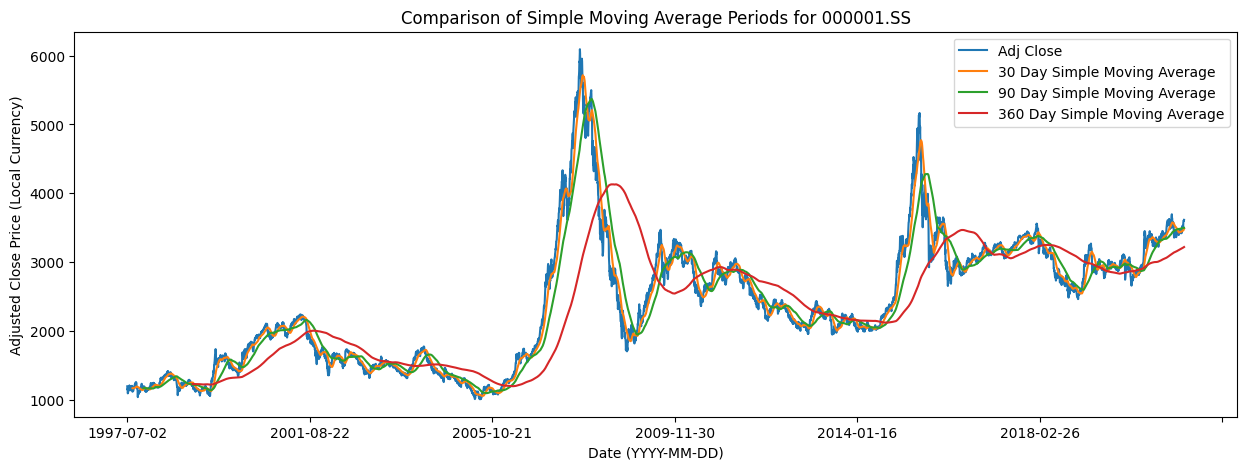

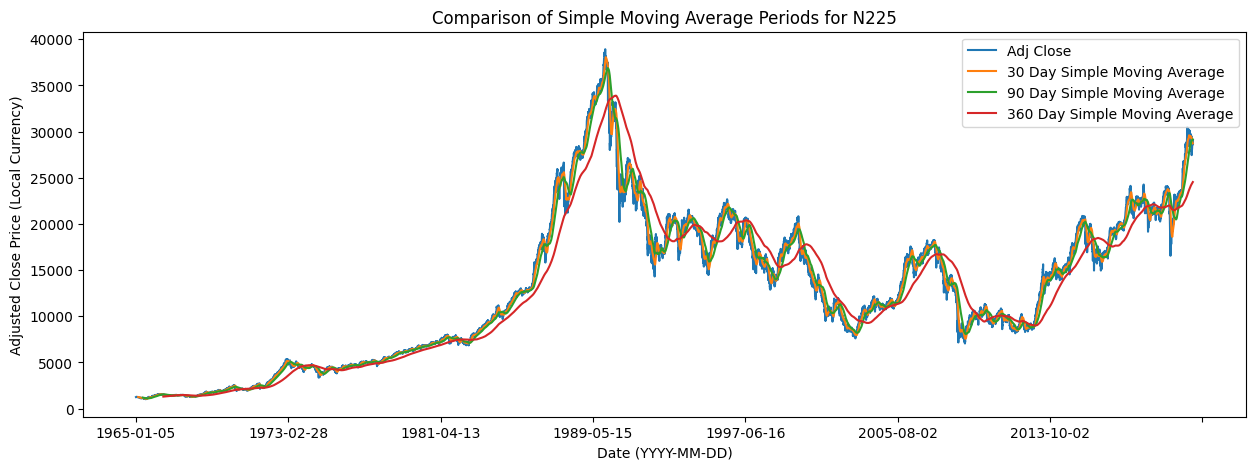

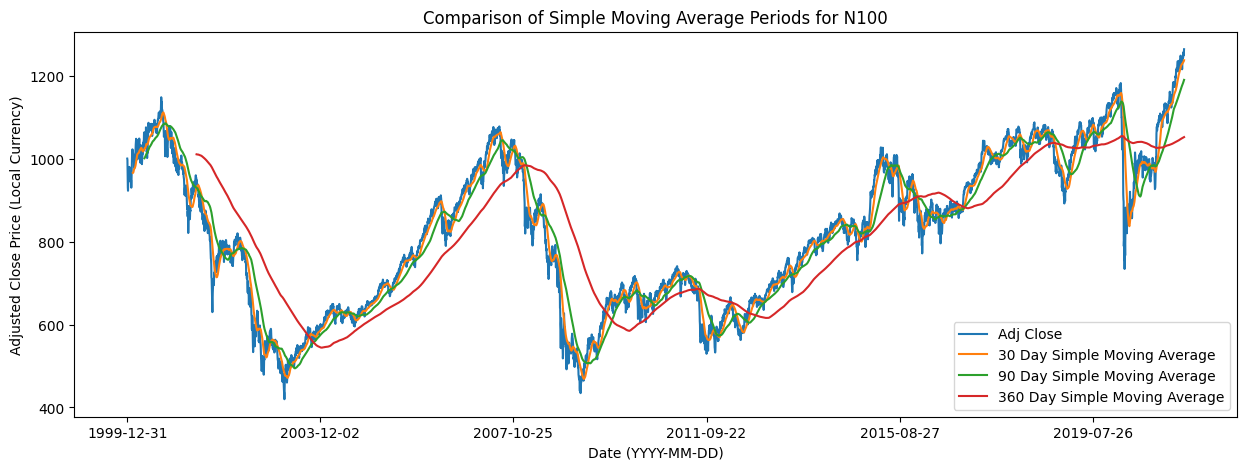

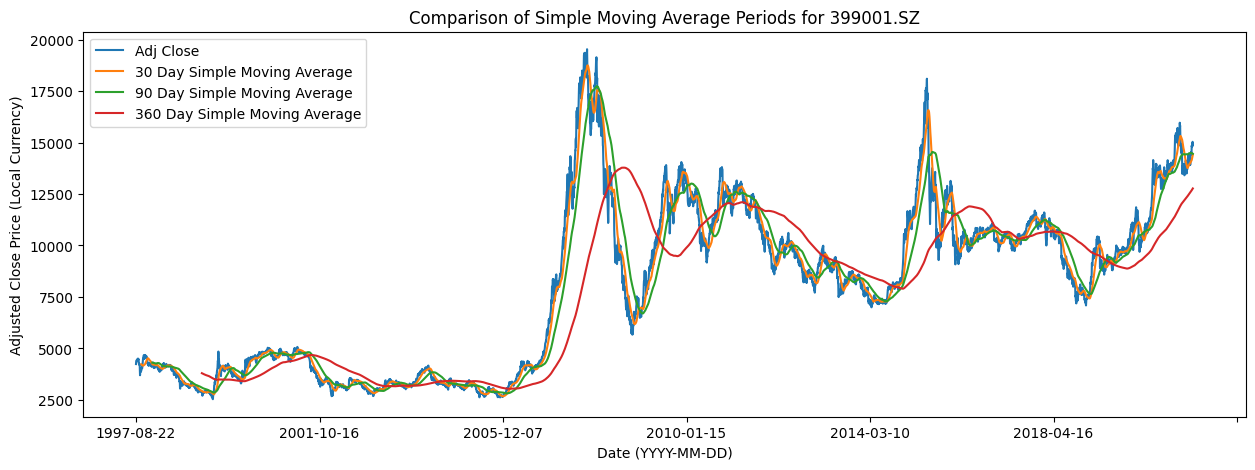

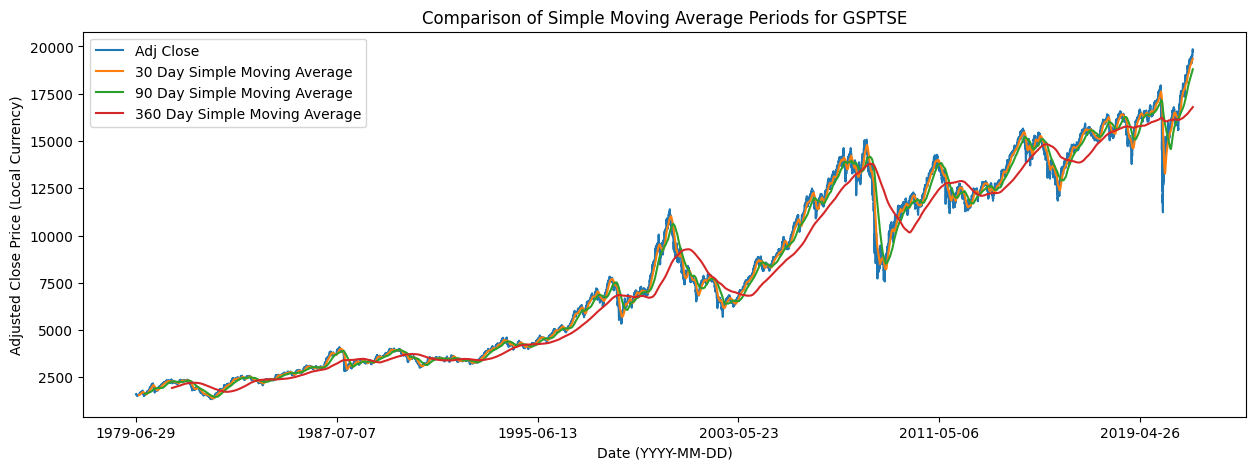

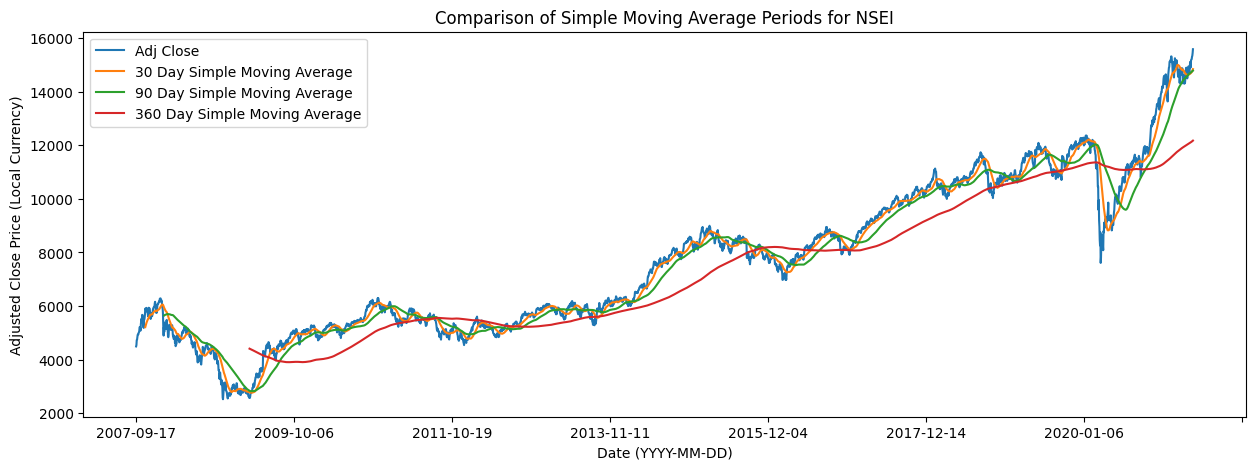

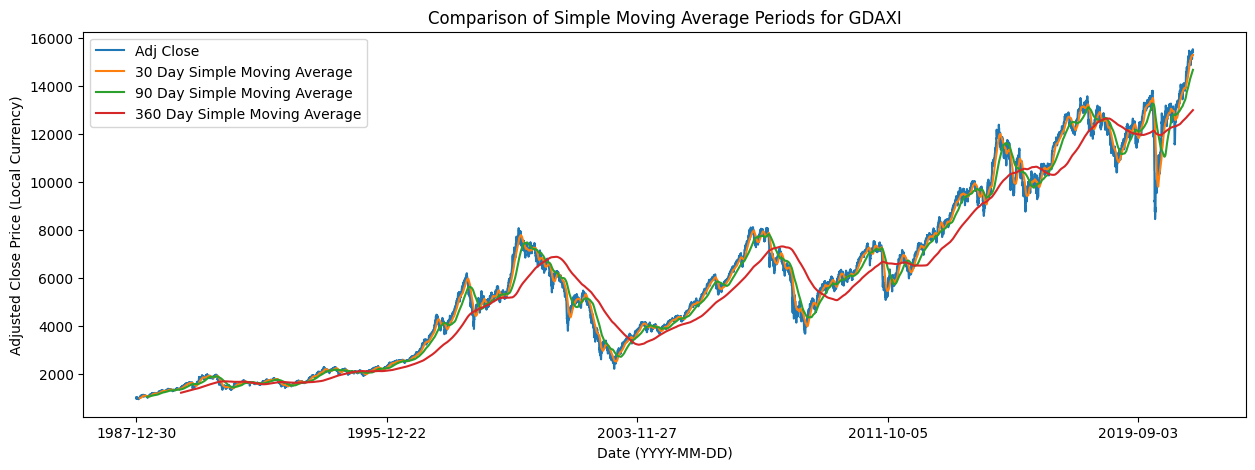

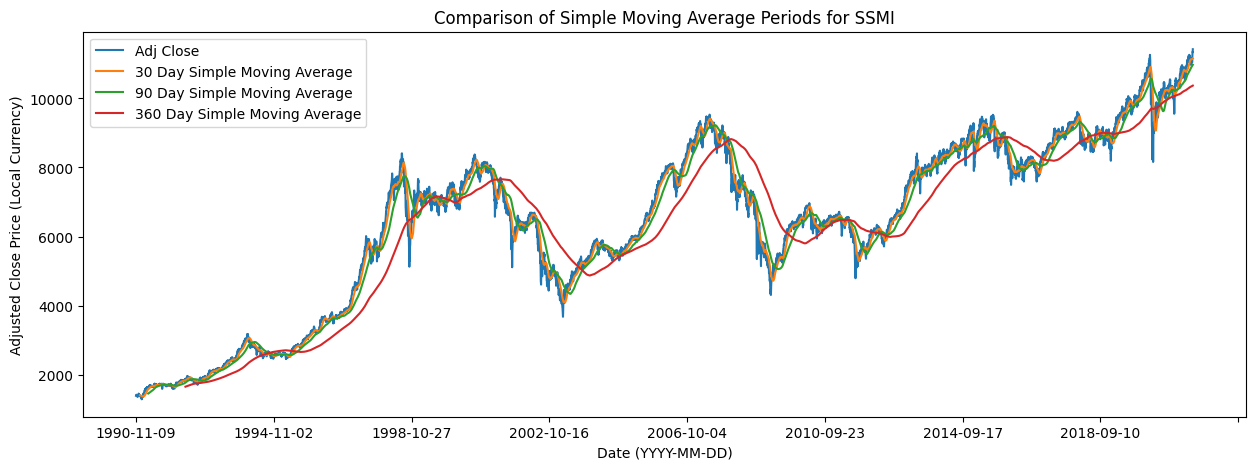

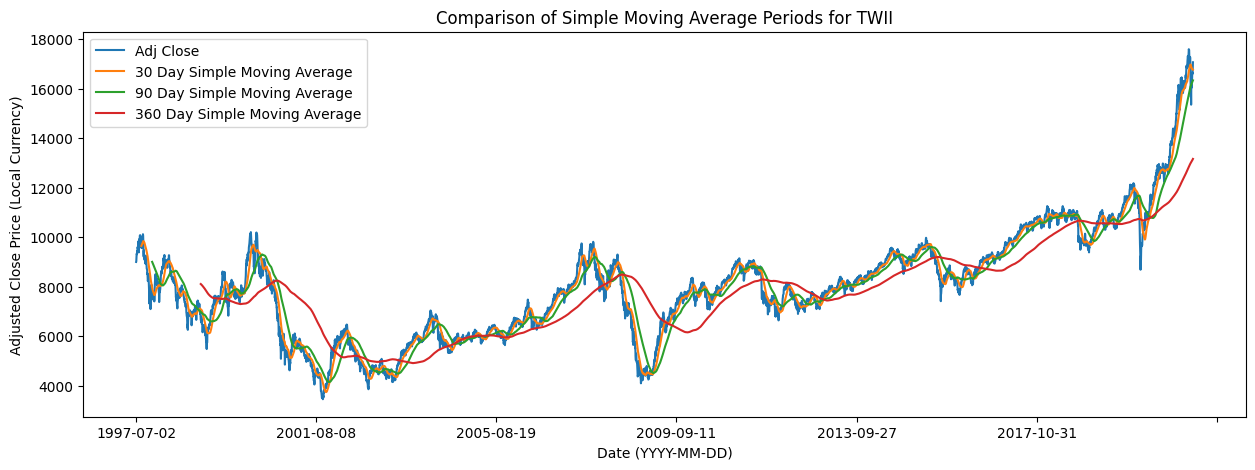

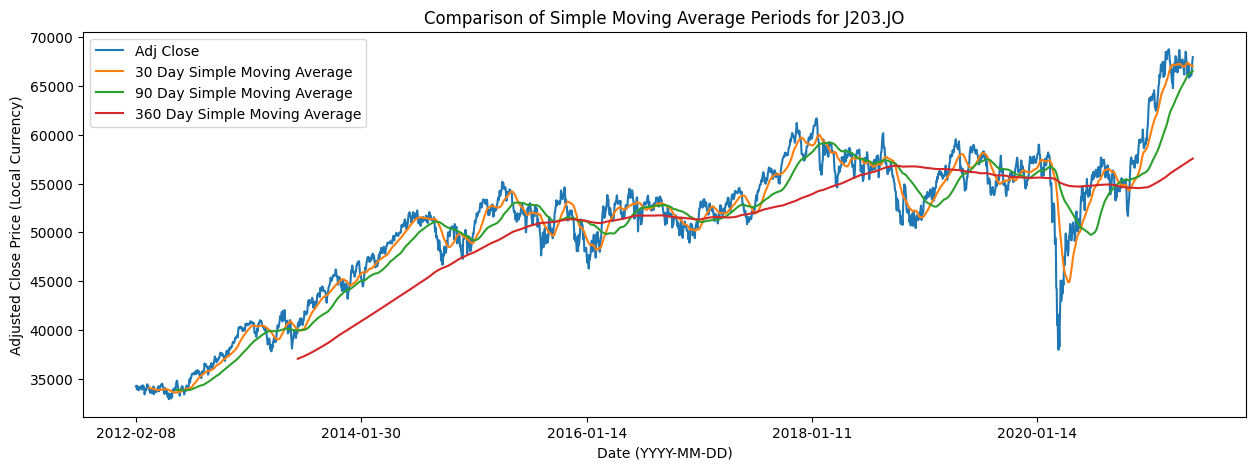

In [30]:
# Calculate simple moving averages for each index.
for index in data["Index"].unique():
    # Increasing the window size smooths the data, but reduces the accuracy.
    data_frames_per_index[index]["30 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(30).mean()
    )
    data_frames_per_index[index]["90 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(90).mean()
    )
    data_frames_per_index[index]["360 Day Simple Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].rolling(360).mean()
    )

# Generate a time series graph for each index.
for index in data["Index"].unique():
    data_frames_per_index[index].plot(
        x="Date",
        y=[
            "Adj Close",
            "30 Day Simple Moving Average",
            "90 Day Simple Moving Average",
            "360 Day Simple Moving Average",
        ],
        xlabel="Date (YYYY-MM-DD)",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Comparison of Simple Moving Average Periods for {index}",
        figsize=(15, 5),
    )


### Exponential Moving Averages

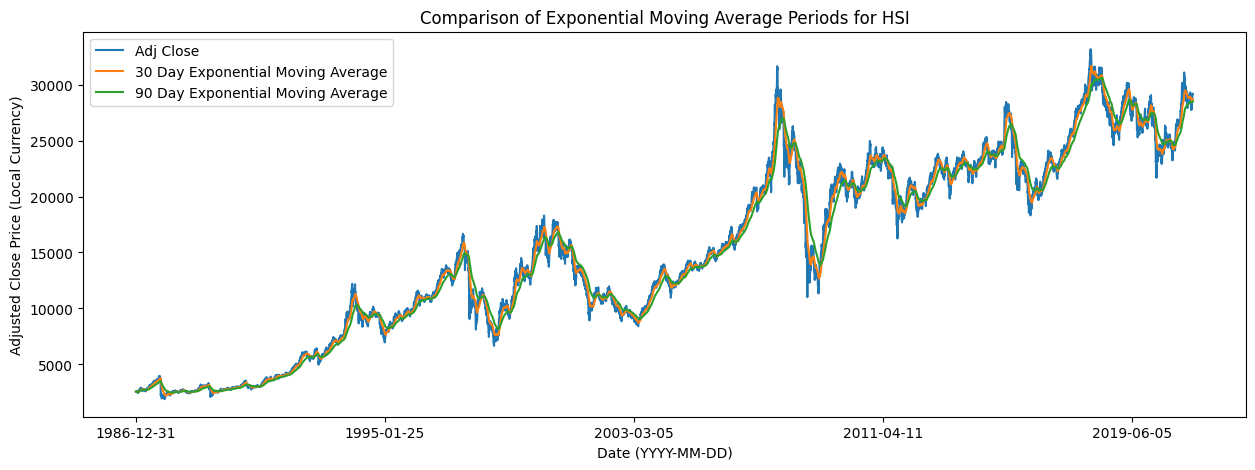

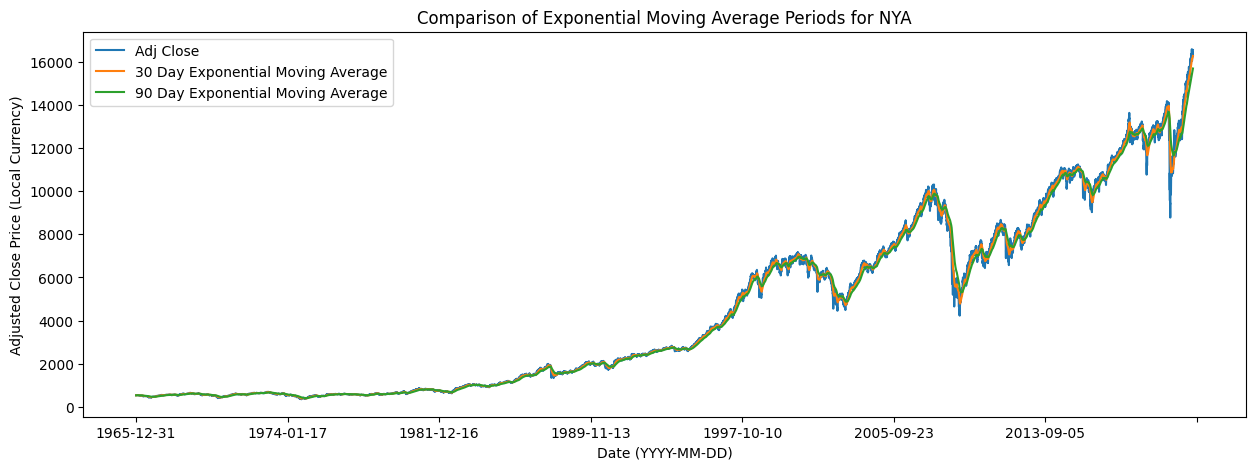

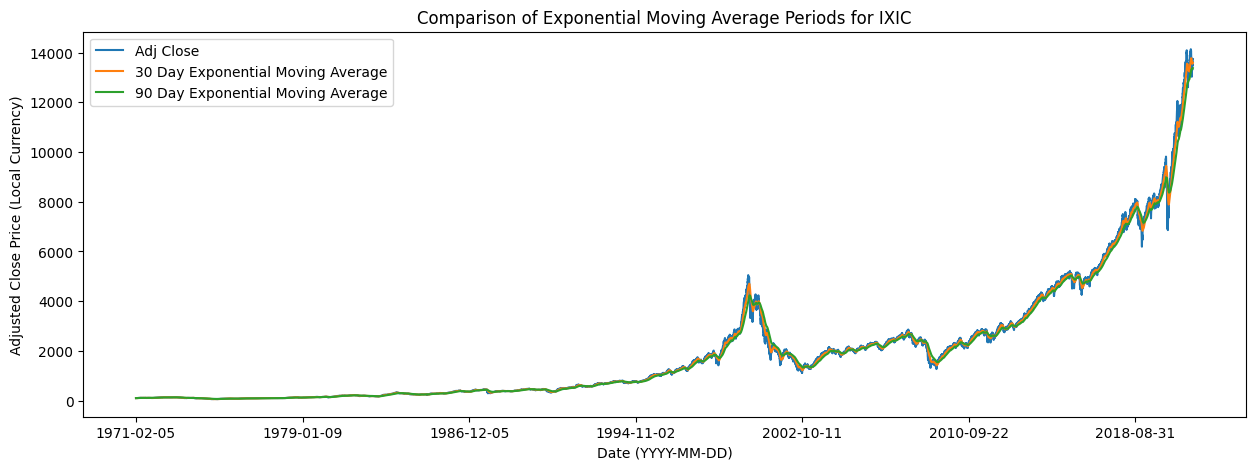

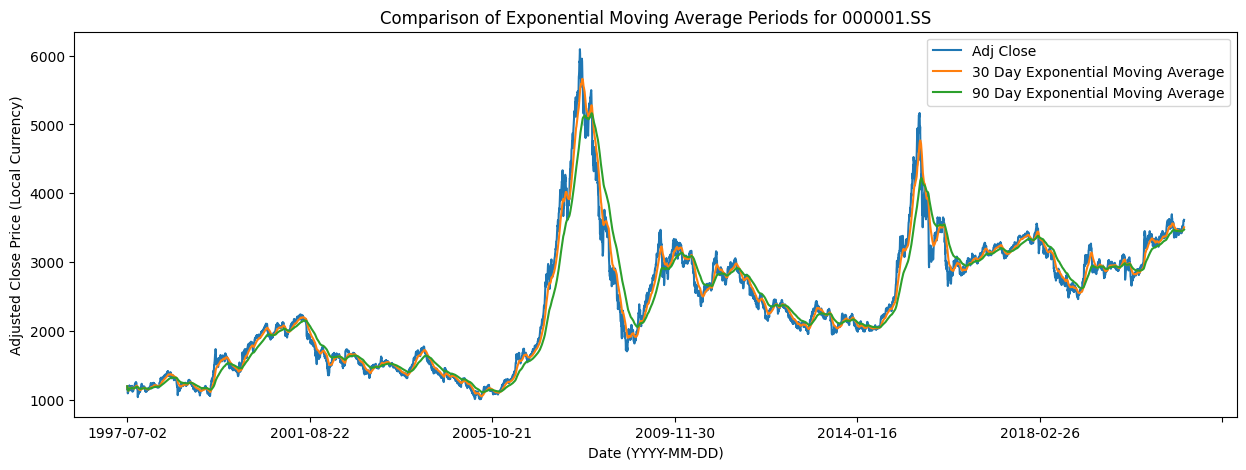

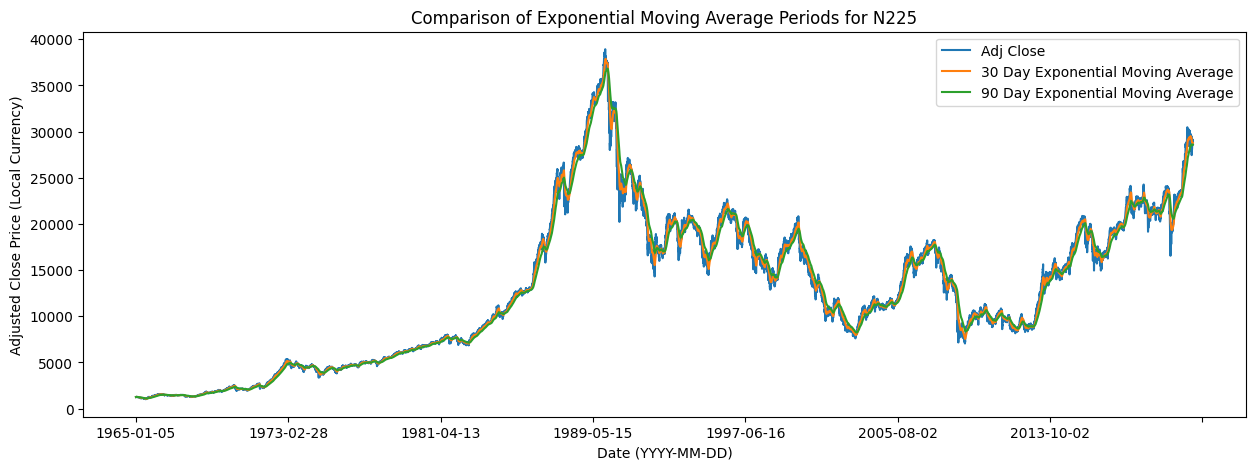

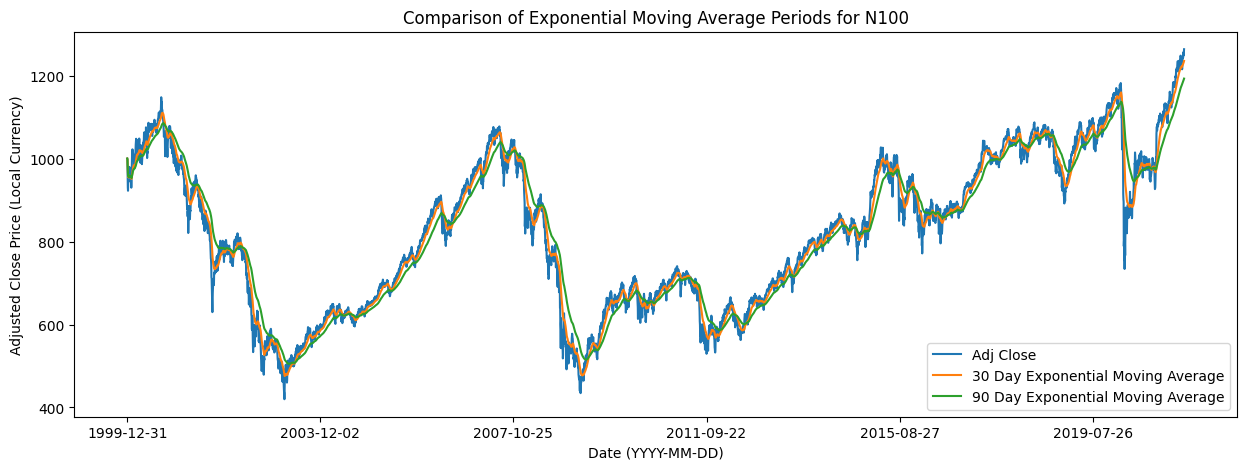

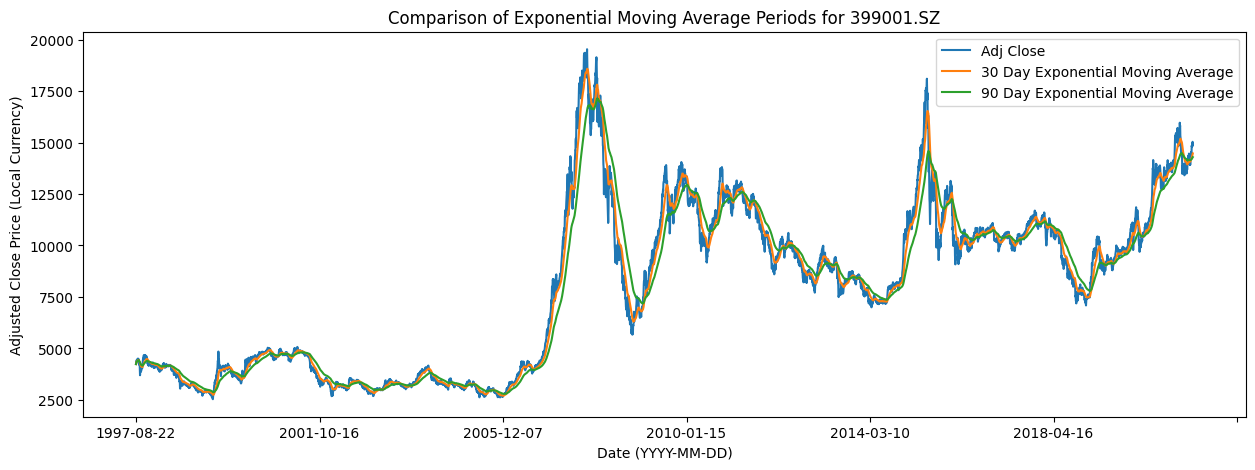

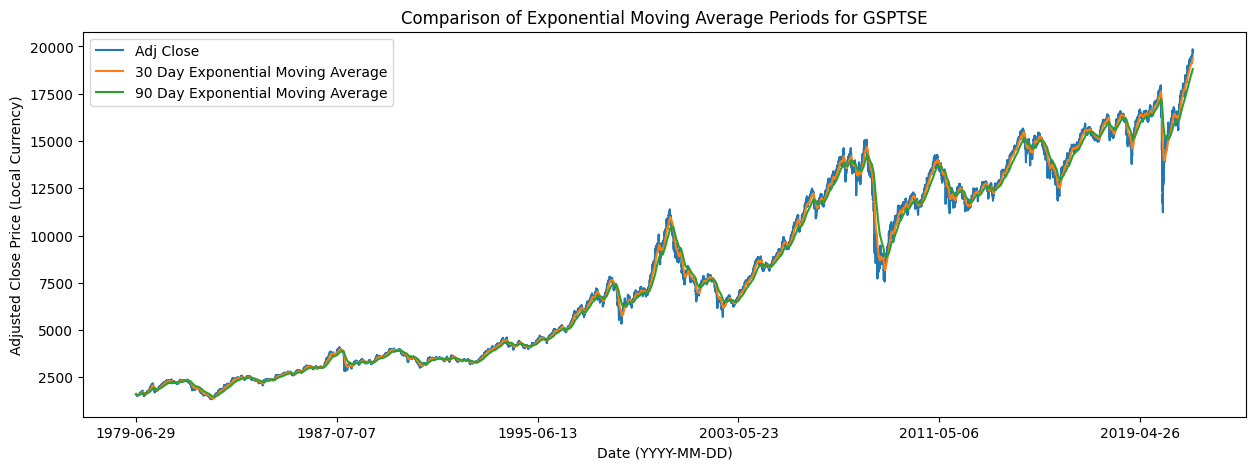

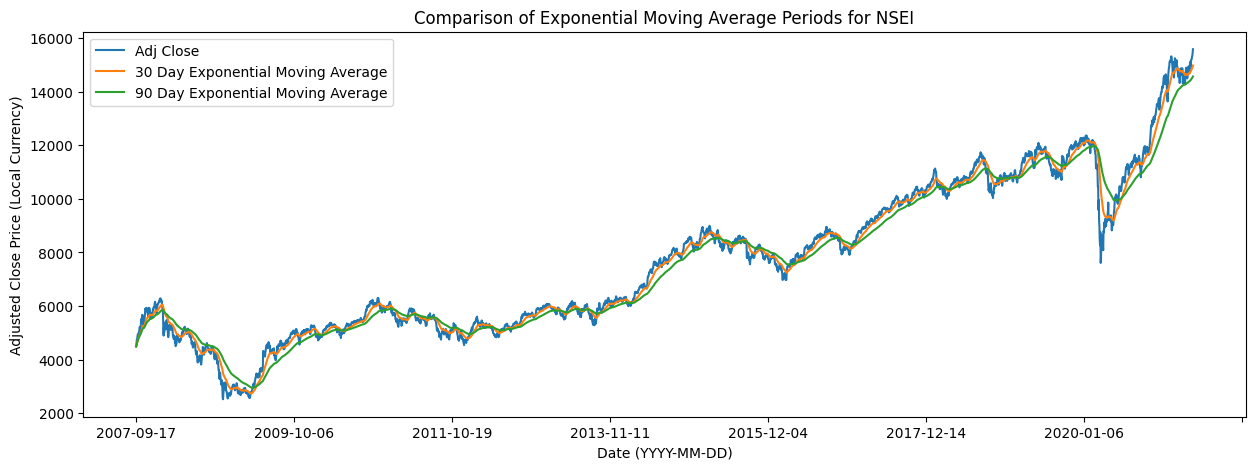

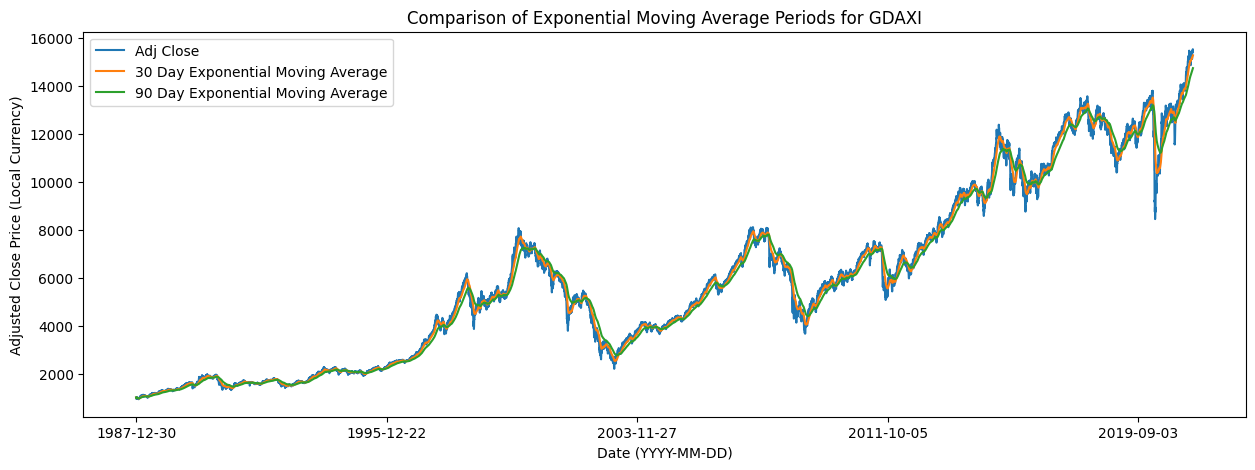

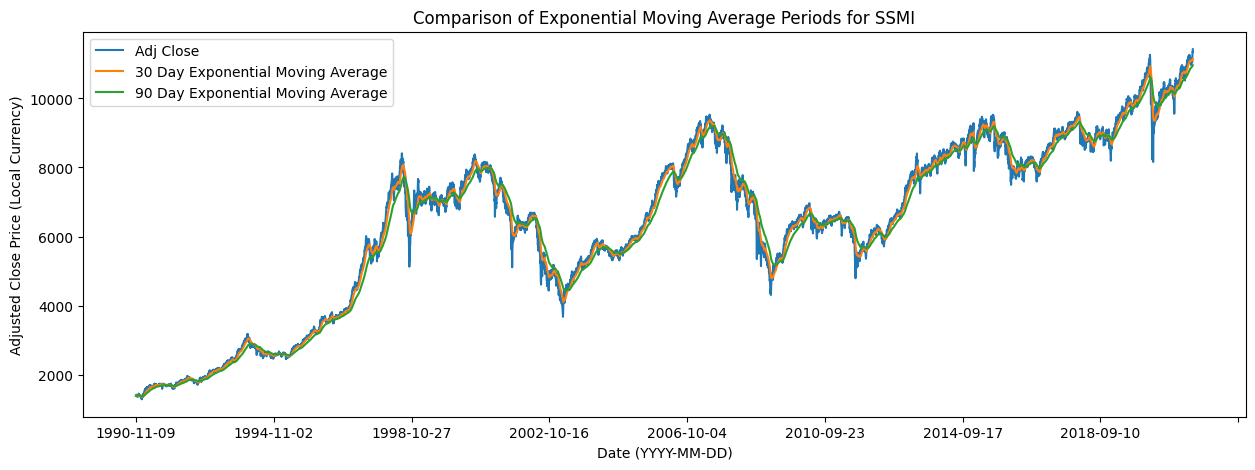

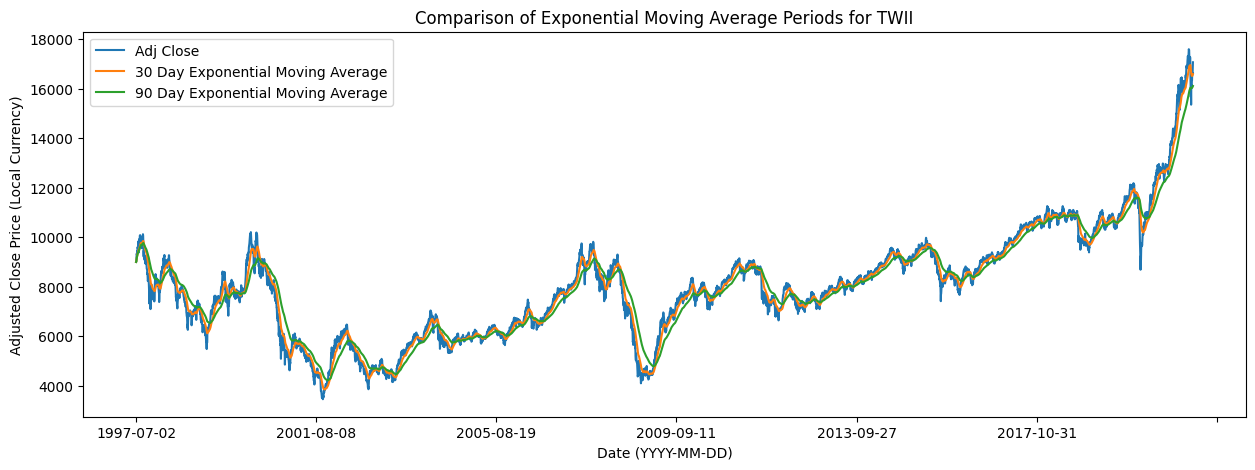

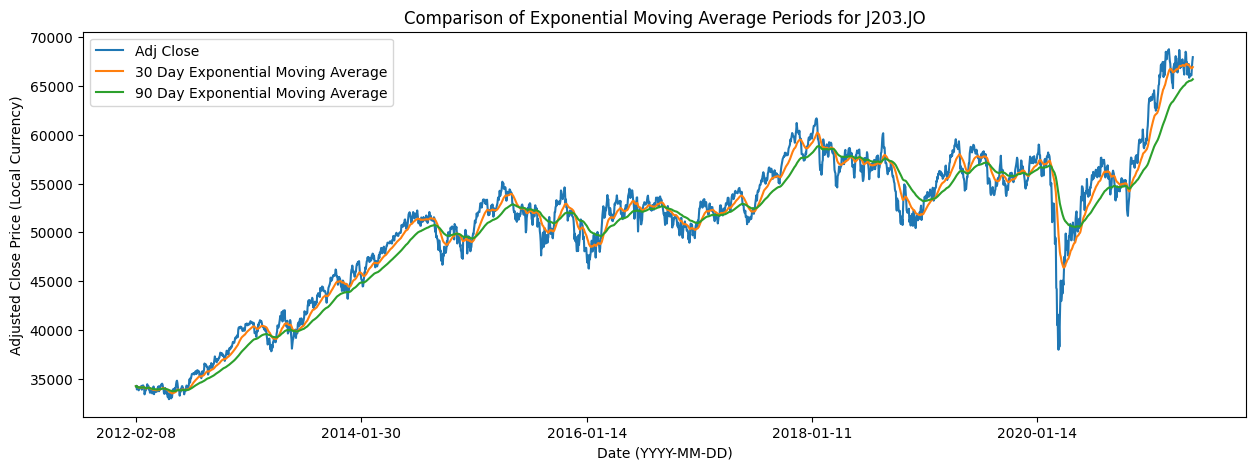

In [31]:
for index in data["Index"].unique():
    # Calculate 30 and 90 day exponential moving averages for each index.
    data_frames_per_index[index]["30 Day Exponential Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].ewm(span=30).mean()
    )
    data_frames_per_index[index]["90 Day Exponential Moving Average"] = (
        data_frames_per_index[index]["Adj Close"].ewm(span=90).mean()
    )

# Generate a time series graph for each index.
for index in data["Index"].unique():
    data_frames_per_index[index].plot(
        x="Date",
        y=[
            "Adj Close",
            "30 Day Exponential Moving Average",
            "90 Day Exponential Moving Average",
        ],
        xlabel="Date (YYYY-MM-DD)",
        ylabel="Adjusted Close Price (Local Currency)",
        title=f"Comparison of Exponential Moving Average Periods for {index}",
        figsize=(15, 5),
    )


## Data Cleaning

### Selecting Moving Average Strategy


<AxesSubplot: title={'center': 'Comparison of Moving Average Strategies for New York Stock Exchange (NYA) - Last 5 Years'}, xlabel='Date (YYYY-MM-DD)', ylabel='Adjusted Close Price (USD)'>

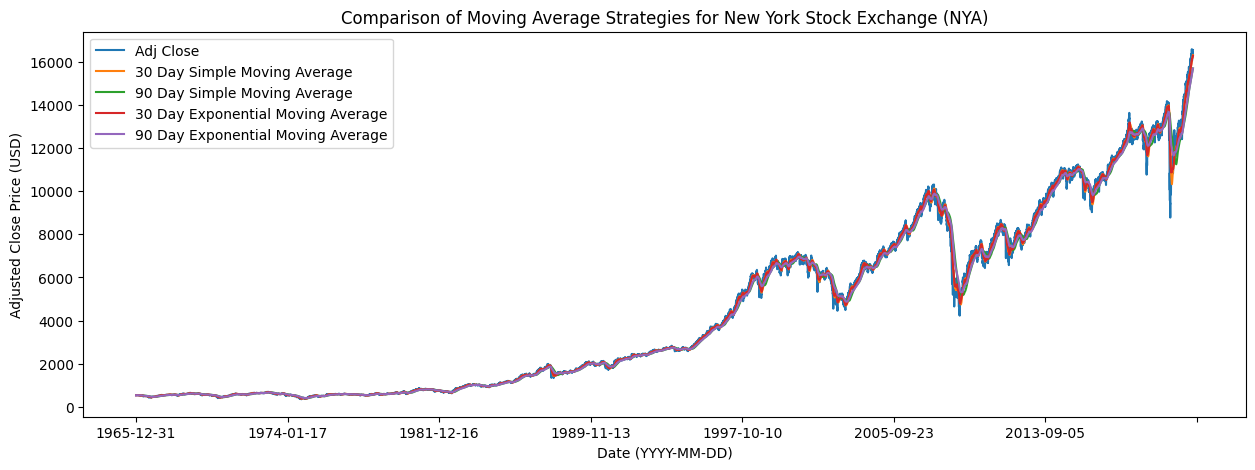

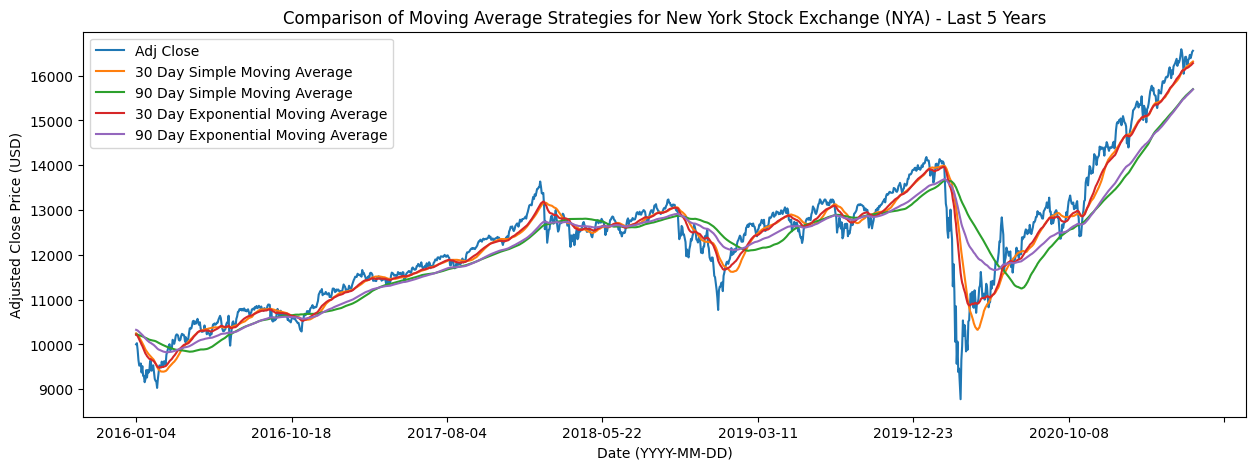

In [32]:
# Focus on the NYA data to simplify our analysis.
nya_data = data_frames_per_index["NYA"]

# Plot the NYA data to compare how the moving average strategies perform.
nya_data.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Simple Moving Average",
        "90 Day Simple Moving Average",
        "30 Day Exponential Moving Average",
        "90 Day Exponential Moving Average",
    ],
    xlabel="Date (YYYY-MM-DD)",
    ylabel="Adjusted Close Price (USD)",
    title=f"Comparison of Moving Average Strategies for New York Stock Exchange (NYA)",
    figsize=(15, 5),
)

# Plot the NYA data from the last five years to zoom into how the moving
# average strategies perform.
nya_data_last_5y = nya_data[(nya_data["Date"] > "2016-00-00")]
nya_data_last_5y.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Simple Moving Average",
        "90 Day Simple Moving Average",
        "30 Day Exponential Moving Average",
        "90 Day Exponential Moving Average",
    ],
    xlabel="Date (YYYY-MM-DD)",
    ylabel="Adjusted Close Price (USD)",
    title=f"Comparison of Moving Average Strategies for New York Stock Exchange (NYA) - Last 5 Years",
    figsize=(15, 5),
)


### Final Data After Preprocessing


<AxesSubplot: title={'center': 'Time Series Graph for New York Stock Exchange (NYA) - Last 5 Years'}, xlabel='Date (YYYY-MM-DD)', ylabel='Adjusted Close Price (USD)'>

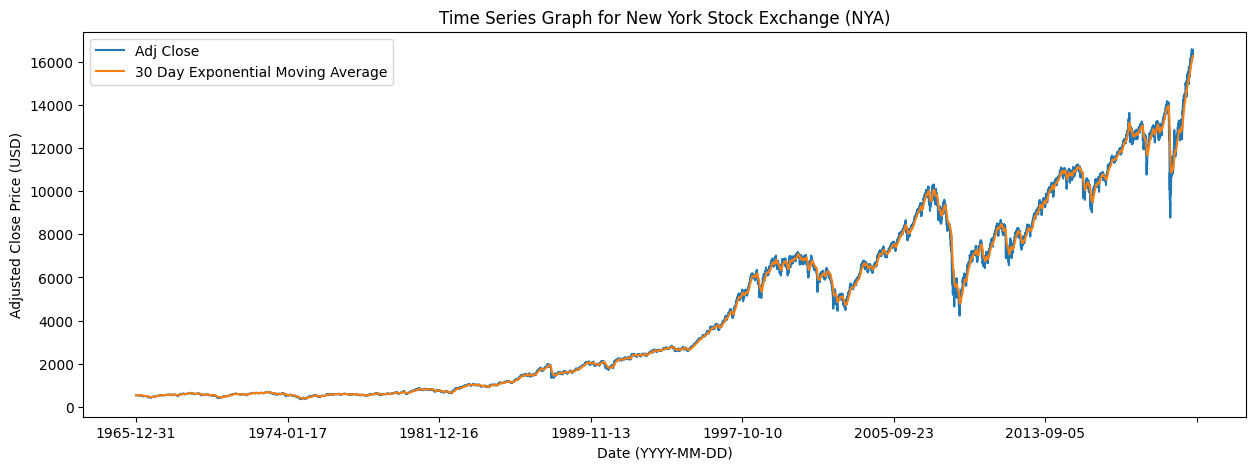

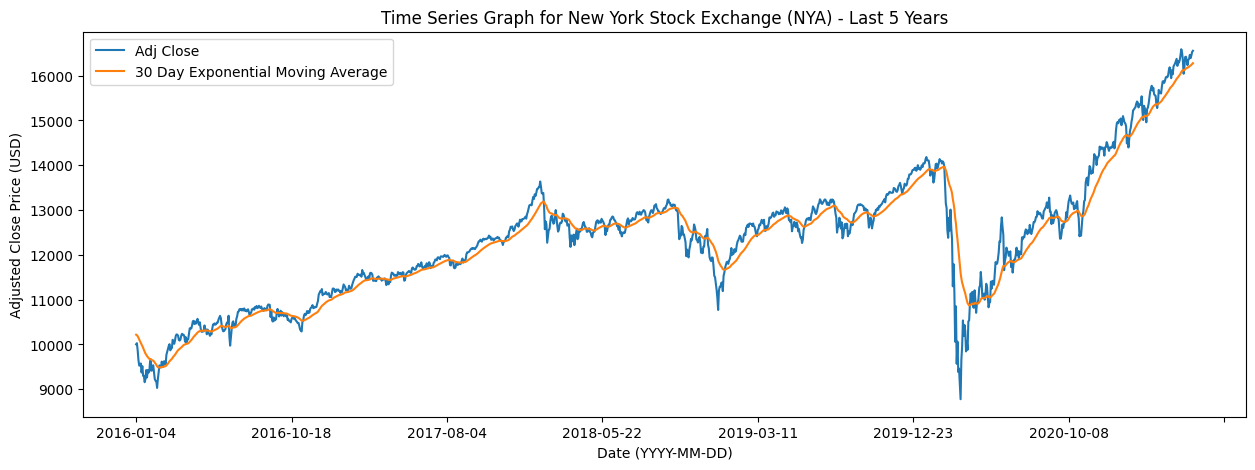

In [33]:
# Restrict analysis to focus on 30 day exponential moving average.
nya_data = nya_data[["Date", "Adj Close", "30 Day Exponential Moving Average"]]
# Plot the NYA data to show what we're working with.
nya_data.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Exponential Moving Average",
    ],
    xlabel="Date (YYYY-MM-DD)",
    ylabel="Adjusted Close Price (USD)",
    title=f"Time Series Graph for New York Stock Exchange (NYA)",
    figsize=(15, 5),
)

# Show a zoomed in view using the last five years of data.
nya_data_last_5y = nya_data[(nya_data["Date"] > "2016-00-00")]
# Plot the NYA data to show what we're working with.
nya_data_last_5y.plot(
    x="Date",
    y=[
        "Adj Close",
        "30 Day Exponential Moving Average",
    ],
    xlabel="Date (YYYY-MM-DD)",
    ylabel="Adjusted Close Price (USD)",
    title=f"Time Series Graph for New York Stock Exchange (NYA) - Last 5 Years",
    figsize=(15, 5),
)


## Modelling

### Generate Training and Test Data Sets for NYA Index


In [34]:
# Generate a training and test data set for the NYA index.
training_data, test_data = train_test_split(nya_data, train_size=0.8, shuffle=True)
print("Training Data:")
display(training_data)
print("Test Data:")
display(test_data)


Training Data:


Date     Adj Close  30 Day Exponential Moving Average
16781  1998-12-03   5957.770020                        5893.801871
20789  2014-11-07  10864.580080                       10655.102637
19391  2009-04-22   5290.609863                        5164.480699
11264  1977-02-04    586.419983                         591.904369
12978  1983-11-16   1013.919983                        1010.083330
...           ...           ...                                ...
11444  1977-10-24    531.219971                         548.633121
9015   1968-01-30    550.679993                         560.647351
11386  1977-08-02    570.239990                         578.242604
8735   1966-12-16    468.839996                         463.487181
14724  1990-10-15   1753.550049                        1811.257652

[11157 rows x 3 columns]

Test Data:


Date    Adj Close  30 Day Exponential Moving Average
11495  1978-01-06   535.450012                         547.546825
11925  1979-09-19   653.030029                         647.549388
15880  1995-05-11  2986.659912                        2919.791723
20151  2012-04-26  8123.069824                        8059.829341
15427  1993-07-27  2625.879883                        2617.324538
...           ...          ...                                ...
10847  1975-06-13   509.549988                         505.949397
12597  1982-05-18   706.750000                         711.855558
16024  1995-12-05  3487.110107                        3371.263152
14998  1991-11-13  2319.560059                        2274.119899
12739  1982-12-08   864.190002                         837.155137

[2790 rows x 3 columns]

## Analysis of Results